In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import types
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import random
import typing

In [ ]:
%matplotlib inline

In [ ]:
def extract_class(name:str) -> str:
  return name.split('_')[-1].split('.')[0]

In [ ]:
!unzip /content/drive/MyDrive/AI_comp_RT22/train_dataset_train.zip -d /content/

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/train/labels/24-11-2021_02-05-58_PM_head..txt  
  inflating: /content/train/labels/24-11-2021_02-05-58_PM_human..txt  
  inflating: /content/train/labels/24-11-2021_02-06-07_PM_car..txt  
  inflating: /content/train/labels/24-11-2021_02-06-07_PM_head..txt  
  inflating: /content/train/labels/24-11-2021_02-06-07_PM_human..txt  
  inflating: /content/train/labels/24-11-2021_02-06-12_PM_car..txt  
  inflating: /content/train/labels/24-11-2021_02-06-32_PM_car..txt  
  inflating: /content/train/labels/24-11-2021_02-06-32_PM_face..txt  
  inflating: /content/train/labels/24-11-2021_02-06-32_PM_head..txt  
  inflating: /content/train/labels/24-11-2021_02-06-32_PM_human..txt  
  inflating: /content/train/labels/24-11-2021_02-06-53_PM_car..txt  
  inflating: /content/train/labels/24-11-2021_02-06-53_PM_head..txt  
  inflating: /content/train/labels/24-11-2021_02-06-53_PM_human..txt  
  inflating: /content/

In [ ]:
%cd /content/

/content


In [ ]:
labs = os.listdir('/content/train/labels')

In [ ]:
car = []
head = []
face = []
human = []
carplate = []
noclass = []

In [ ]:

for i in range(len(labs)):
  if extract_class(labs[i]) == 'car':
    car.append(labs[i])
  elif extract_class(labs[i]) == 'head':
    head.append(labs[i])
  elif extract_class(labs[i]) == 'face':
    face.append(labs[i])
  elif extract_class(labs[i]) == 'human':
    human.append(labs[i])
  elif extract_class(labs[i]) == 'carplate':
    carplate.append(labs[i])
  else: noclass.append(labs[i])

In [ ]:
data = []
data.append(len(car))
data.append(len(head))
data.append(len(face))
data.append(len(human))
data.append(len(carplate))

In [ ]:
indexes = ['car', 'head', 'face', 'human', 'carplate']

<BarContainer object of 5 artists>

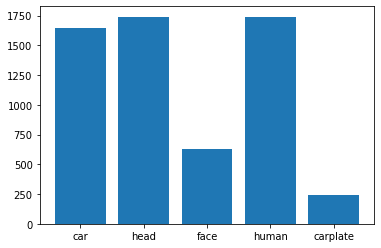

In [ ]:
plt.bar(indexes, data)

Поиск лейблов с таким же названием( только _human вместо _head), затем добавление туда данных из _head, с изменением номера класса с 0 на 1

In [ ]:
human_wo_cat = []
for i in range(len(human)):


  human_wo_cat.append(human[i][:-11])

In [ ]:
for i in range(len(human)):
  print(i)

In [ ]:
labels_folder = '/content/train/labels/'
for i in range(len(head)):
  if head[i][:-10] in human_wo_cat:
    try:


      f_head = open(labels_folder + head[i], 'r')
      f_human = open(labels_folder + head[i][:-10] + '_human..txt', 'a' )


      print('file is opened')
      lines = []
      lines = list(f_head.readlines())
      
      for line in lines:
        
        f_human.write('1' + str(line[1:]))
        print(f"data from file: {f_head.name} was appended to file: {f_human.name}"  )
  
    finally:

      f_head.close()
      f_human.close()
  



Выходные данные были обрезаны до нескольких последних строк (5000).
file is opened
data from file: /content/train/labels/25-11-2021_02-17-24_AM_head..txt was appended to file: /content/train/labels/25-11-2021_02-17-24_AM_human..txt
file is opened
data from file: /content/train/labels/26-11-2021_03-00-01_AM_head..txt was appended to file: /content/train/labels/26-11-2021_03-00-01_AM_human..txt
file is opened
data from file: /content/train/labels/25-11-2021_03-05-49_PM_head..txt was appended to file: /content/train/labels/25-11-2021_03-05-49_PM_human..txt
file is opened
data from file: /content/train/labels/25-11-2021_08-50-24_AM_head..txt was appended to file: /content/train/labels/25-11-2021_08-50-24_AM_human..txt
file is opened
data from file: /content/train/labels/23-11-2021_04-24-54_PM_head..txt was appended to file: /content/train/labels/23-11-2021_04-24-54_PM_human..txt
data from file: /content/train/labels/23-11-2021_04-24-54_PM_head..txt was appended to file: /content/train/labe

In [ ]:

random.shuffle(human)

In [ ]:
random.shuffle(head)

In [ ]:
train_human = human[:int(len(human) - int(len(human)*0.2))]

In [ ]:
train_head = head[:int(len(head) - int(len(head)*0.2))]

In [ ]:
test_human = human[1393:]

In [ ]:
test_head = head[1393:]

In [ ]:
random.shuffle(train_human)

In [ ]:
random.shuffle(train_head)

In [ ]:
val_human = train_human[:200]

In [ ]:
val_head = train_head[:200]

In [ ]:
train_human = train_human[200:]

In [ ]:
train_head = train_head[200:]

In [ ]:
train_head[10]

'23-11-2021_04-42-29_PM_head..txt'

In [ ]:
train_human[1]

'23-11-2021_05-54-13_PM_human..txt'

### Performing human detection training and testing within train dataset

In [ ]:
!pip uninstall opencv-python-headless 
!pip install "opencv-python-headless<4.3" 

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!pip install -U git+https://github.com/albumentations-team/albumentations

In [ ]:
%pip install wandb

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies


import torch
import os
from IPython.display import Image, clear_output  # to display images
import shutil
from PIL import Image 
import os

In [ ]:
%cd /content/

In [ ]:
%mkdir human_dataset
%cd human_dataset/
%mkdir test
%mkdir train
%mkdir val
%mkdir test/images/
%mkdir test/labels/
%mkdir train/images/
%mkdir train/labels/
%mkdir val/images/
%mkdir val/labels/
  

In [ ]:
def dataset_creation(names_lst:list, images_path:str, labels_path:str, dst_path:str):
  for i in range(len(names_lst)):
    #4 human
    img_name =str(names_lst[i][:-11] + '.jpg')
    #4 head
    #img_name =str(names_lst[i][:-10] + '.jpg')
    shutil.copy(labels_path + str(names_lst[i]), dst_path + 'labels/')
    #4 human
    os.rename(dst_path + 'labels/' + str(names_lst[i]), dst_path + 'labels/' + str(names_lst[i][:-11] + '.txt'))
    #4 head
    #os.rename(dst_path + 'labels/' + str(names_lst[i]), dst_path + 'labels/' + str(names_lst[i][:-10] + '.txt'))
    shutil.copy(images_path + img_name, dst_path + 'images/' )
    #print(img_name)
    #print(str(names_lst[i][:-11] + '.txt'))
    

In [ ]:
%cd /content/

/content


In [ ]:
image_path = '/content/train/images/'
labels_path = '/content/train/labels/'
dst_path = '/content/human_dataset/val/'
names_lst = val_human


In [ ]:
dataset_creation(names_lst, image_path, labels_path, dst_path)



 удаление файлов (есчО)

In [ ]:
dlt_path = '/content/human_dataset/train/labels/'

In [ ]:
for i in (os.listdir(dlt_path)):
  os.remove(dlt_path + i)



In [ ]:
%rmdir /content/human_dataset/train/labels/.ipynb_checkpoints

In [ ]:
%cd ..

/content


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --batch -1 --epochs 300 --data coco128.yaml --weights yolov5s.pt

wandb: Currently logged in as: ebds. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/ultralytics/yolov5
   4bb3052..f5335f2  master     -> origin/master
github:

In [ ]:
!python val.py --weights '/content/yolov5/runs/train/exp5/weights/best.pt' --data coco128.yaml --img 640

val: data=/content/yolov5/data/coco128.yaml, weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-376-g48a8531 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 308 layers, 21041679 parameters, 0 gradients, 50.2 GFLOPs
val: Scanning '/content/human_dataset/val/labels.cache' images and labels... 200 found, 0 missing, 0 empty, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 7/7 [00:12<00:00,  1.75s/it]
                 all        200       1101      0.805       0.61      0.672      0.379
              person        200        552      0.869      0.736      0.

после обучения на 9 эпохах с качеством 640, стандартными параметрами, m@P на тестовом (347 изображений из трейна) без обогащения, без аугментации = 0.714

In [ ]:
%cd /content/yolov5/

/content/yolov5


In [ ]:
!python -c "from utils.general import *; strip_optimizer('/content/drive/MyDrive/AI_comp_RT22/crowdhuman_dataset/crowdhuman_yolov5m.pt')"

Optimizer stripped from /content/drive/MyDrive/AI_comp_RT22/crowdhuman_dataset/crowdhuman_yolov5m.pt, 42.4MB


In [ ]:
!python train.py --img 1088 --batch -1 --epochs 200 --data coco128.yaml --weights '/content/drive/MyDrive/AI_comp_RT22/crowdhuman_dataset/crowdhuman_yolov5m.pt'  --hyp '/content/yolov5/data/hyps/hyp.scratch-low.yaml' --optimizer 'Adam'

wandb: Currently logged in as: ebds. Use `wandb login --relogin` to force relogin
train: weights=/content/drive/MyDrive/AI_comp_RT22/crowdhuman_dataset/crowdhuman_yolov5m.pt, cfg=, data=coco128.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=-1, imgsz=1088, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 1), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://githu

In [ ]:
!python train.py --img 1080 --batch -1 --epochs 50 --data coco128.yaml --weights yolov5s.pt  --hyp '/content/yolov5/data/hyps/hyp.scratch-low.yaml'

In [ ]:
!python detect.py --weights '/content/drive/MyDrive/AI_comp_RT22/crowdhuman_dataset/crowdhuman_yolov5m.pt' --source '/content/human_dataset/test/images/23-11-2021_04-08-16_PM.jpg'

detect: weights=['/content/drive/MyDrive/AI_comp_RT22/crowdhuman_dataset/crowdhuman_yolov5m.pt'], source=/content/human_dataset/test/images/23-11-2021_04-08-16_PM.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-376-g48a8531 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 308 layers, 21041679 parameters, 0 gradients
image 1/1 /content/human_dataset/test/images/23-11-2021_04-08-16_PM.jpg: 384x640 5 persons, 2 heads, Done. (0.020s)
Speed: 2.2ms pre-process, 19.8ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2
